# Evaluación Final - Python for Data Analysis

### INTEGRANTES:
- Apagüeño Fashé, Vera Lucia
- Eustaquio Jiménez, Roberto Edmundo
- Martell Morayra, Yago Derek
- Ugarte Salas, Rafael

In [1]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model  # Importar el módulo de regresión lineal
from sklearn.tree import DecisionTreeRegressor  # Importar modelo de Árbol de Decisión
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Traemos la librería necesaria para extraer el Data Frame
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#NOTA, ESTO NO ES PARA EL INFORME, SOLO ES PARA ALGUNAS PARTES DEL CODIGO QUE SALE UN MENSAJE Y AFECTA AL TOMAR FOTOS PARA EL INFORME
import warnings
warnings.filterwarnings("ignore") #ignora mensajes de advertencia

In [3]:
# Definimos la ruta del archivo en Google Drive
nombre = "/content/drive/MyDrive/IDAT/dataset (1).txt"

# Cargamos el archivo en un DataFrame
df = pd.read_csv(nombre)

# 1. Exploración Inicial de los Datos

In [4]:
# Información general del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150150 entries, 0 to 150149
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   ID           150150 non-null  int64  
 1   Store ID     150150 non-null  int64  
 2   Total Price  150149 non-null  float64
 3   Base Price   150150 non-null  float64
 4   Units Sold   150150 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 5.7 MB


In [5]:
# Estadísticas descriptivas del dataset
df.describe()

,ID,Store ID,Total Price,Base Price,Units Sold
count,150150.000000,150150.000000,150149.000000,150150.000000,150150.000000
mean,106271.555504,9199.422511,206.626751,219.425927,51.674206
std,61386.037861,615.591445,103.308516,110.961712,60.207904
min,1.000000,8023.000000,41.325000,61.275000,1.000000
25%,53111.250000,8562.000000,130.387500,133.237500,20.000000
50%,106226.500000,9371.000000,198.075000,205.912500,35.000000
75%,159452.750000,9731.000000,233.700000,234.412500,62.000000
max,212644.000000,9984.000000,562.162500,562.162500,2876.000000


In [6]:
# Verificamos si hay valores nulos
df.isnull().sum()

,0
ID,0
Store ID,0
Total Price,1
Base Price,0
Units Sold,0


# 2. Limpieza de datos

In [7]:
# Eliminar valores nulos en la columna "Total Price"
df = df.dropna(subset=["Total Price"])

# 3. Visualización de datos
- Total de ventas por cada una de las tiendas
- Top 10 tiendas en ventas
- Peores 10 tiendas en ventas
- Vemos la relación entre el precio de venta, y las unidades vendidas

In [8]:
# En primer lugar, haremos agrupacion necesaria para obtener las ventas por tienda, unidades vendidas y precio promedio por tienda
ventas_por_tienda = df.groupby("Store ID")["Total Price"].sum().sort_values(ascending=False)
unidades_por_tienda = df.groupby("Store ID")["Units Sold"].sum().sort_values(ascending=False)
precio_promedio = df.groupby("Store ID")["Total Price"].mean().sort_values(ascending=False)

Total de ventas por tienda

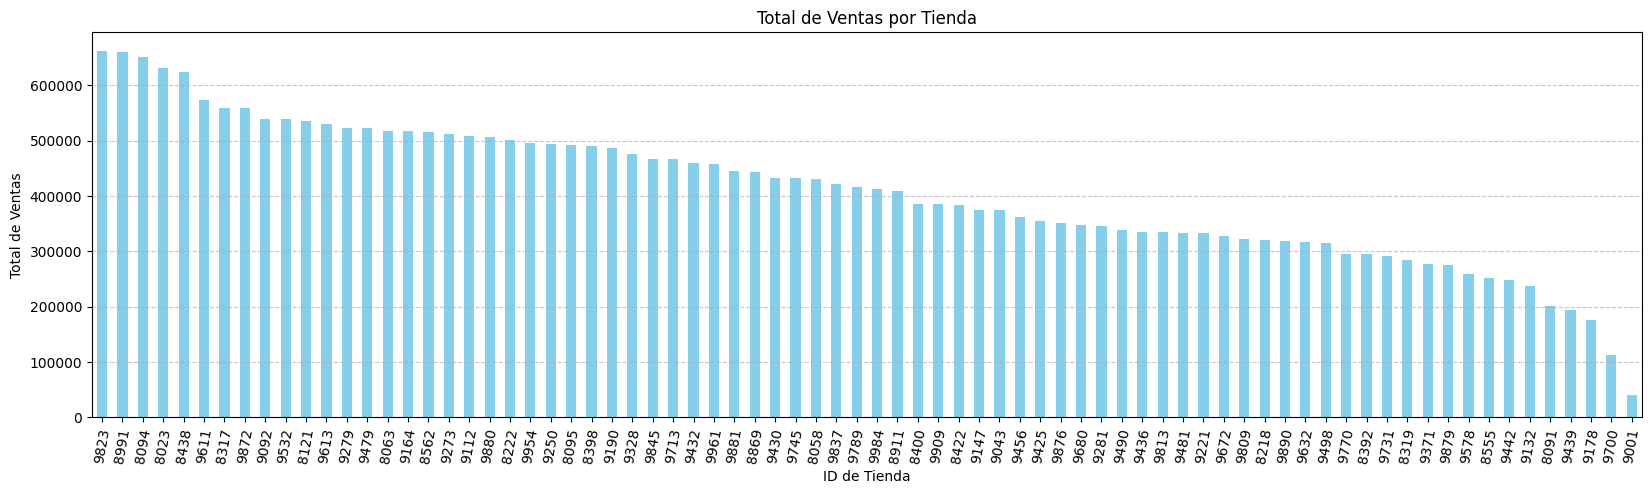

In [9]:
plt.figure(figsize=(20, 5))
ventas_por_tienda.plot(kind="bar", color="skyblue")

# Graficar
plt.title("Total de Ventas por Tienda")
plt.xlabel("ID de Tienda")
plt.ylabel("Total de Ventas")
plt.xticks(rotation=80)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

Total de unidades vendidas por tienda

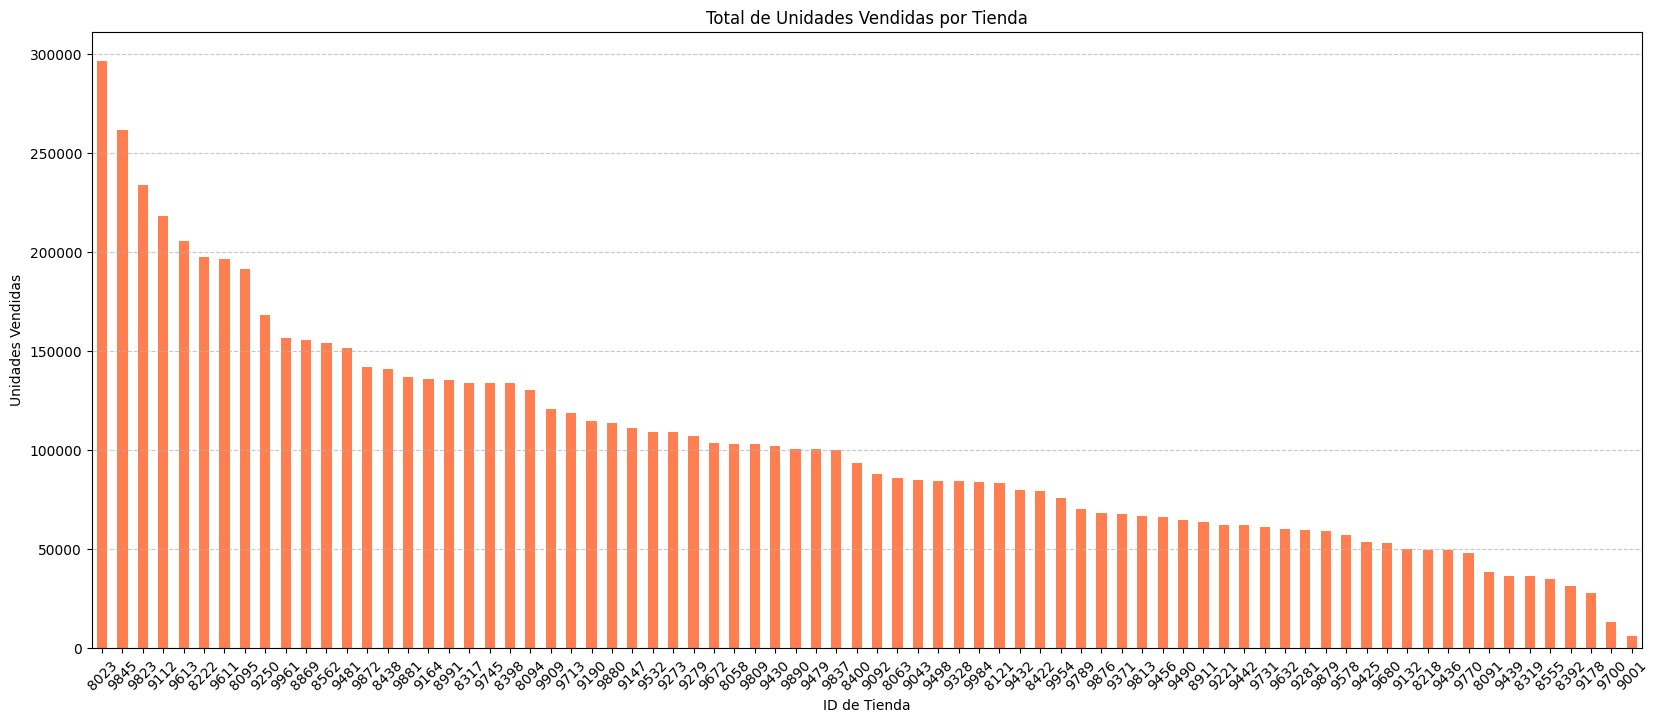

In [10]:
plt.figure(figsize=(20, 8))
unidades_por_tienda.plot(kind="bar", color="coral")

# Graficar
plt.title("Total de Unidades Vendidas por Tienda")
plt.xlabel("ID de Tienda")
plt.ylabel("Unidades Vendidas")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

Precio promedio por tienda

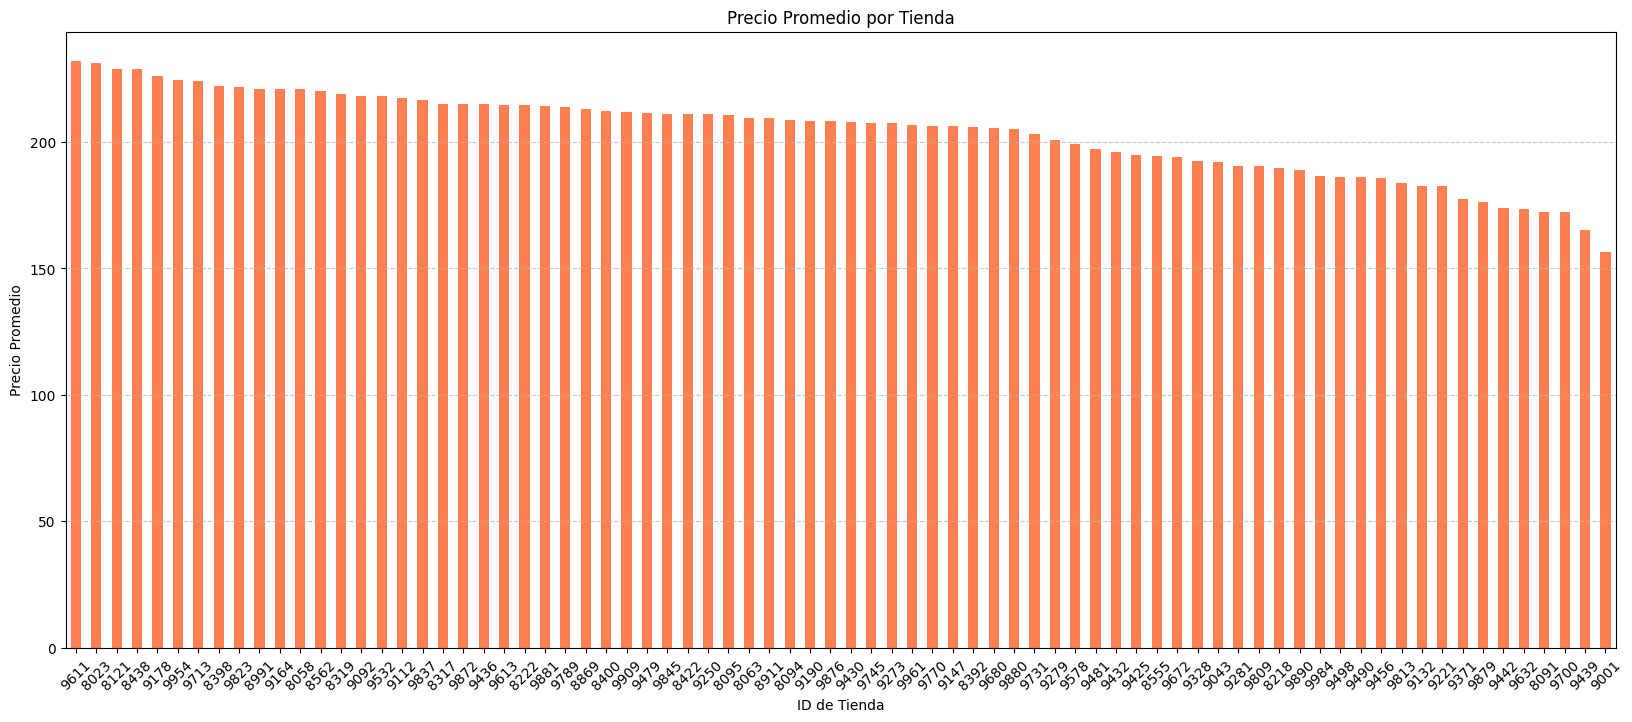

In [11]:
plt.figure(figsize=(20, 8))
precio_promedio.plot(kind="bar", color="coral")

# Graficar
plt.title("Precio Promedio por Tienda")
plt.xlabel("ID de Tienda")
plt.ylabel("Precio Promedio")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

Top 10 tiendas con más ventas

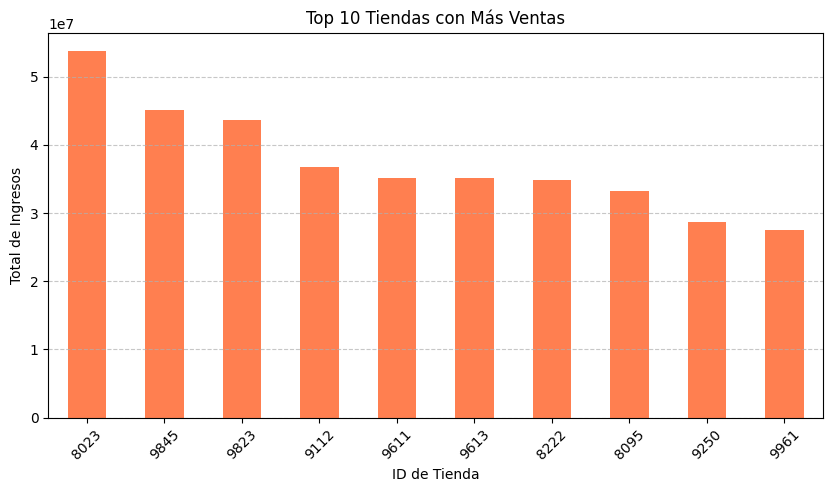

In [12]:
# Calcular los ingresos totales
df["Total Revenue"] = df["Total Price"] * df["Units Sold"]

# Agrupar los ingresos por tienda
ventas_por_tienda = df.groupby("Store ID")["Total Revenue"].sum().sort_values(ascending=False)

# Filtrar las 10 tiendas con más ingresos
top_n = 10
ventas_top = ventas_por_tienda.head(top_n)

# Graficar
plt.figure(figsize=(10, 5))
ventas_top.plot(kind="bar", color="coral")
plt.title(f"Top {top_n} Tiendas con Más Ventas")
plt.xlabel("ID de Tienda")
plt.ylabel("Total de Ingresos")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

Top 10 tiendas con más unidades vendidas

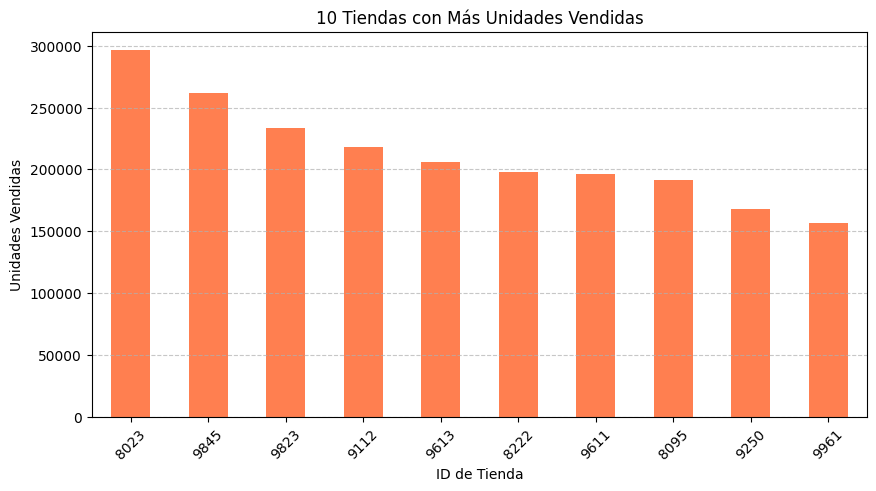

In [13]:
# Filtrar solo las 10 tiendas con más ventas
top_n = 10
unidades_top = unidades_por_tienda.head(top_n)

# Graficar
plt.figure(figsize=(10, 5))
unidades_top.plot(kind="bar", color="coral")
plt.title(f"{top_n} Tiendas con Más Unidades Vendidas")
plt.xlabel("ID de Tienda")
plt.ylabel("Unidades Vendidas")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

Tiendas con los precios más altos

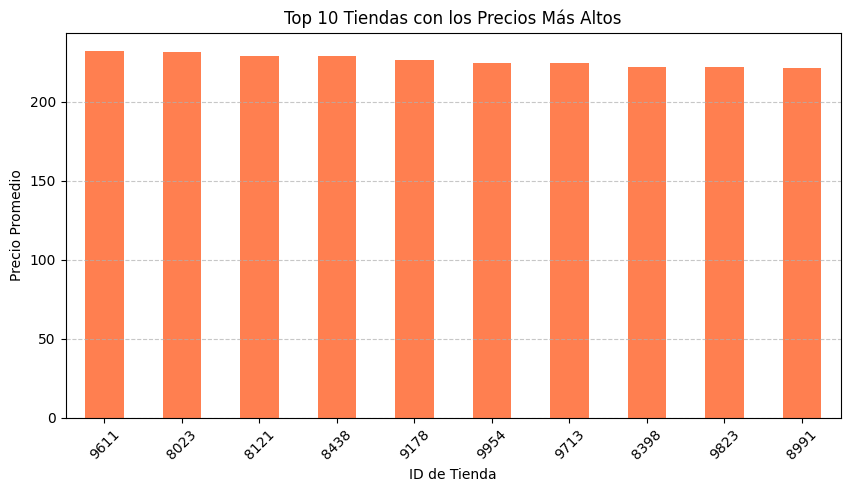

In [14]:
# Filtrar las 10 tiendas con los precios promedio más altos
precio_mas_altos = precio_promedio.head(10)

# Graficar
plt.figure(figsize=(10, 5))
precio_mas_altos.plot(kind="bar", color="coral")
plt.title(f"Top 10 Tiendas con los Precios Más Altos")
plt.xlabel("ID de Tienda")
plt.ylabel("Precio Promedio")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

Peores 10 tiendas en ventas

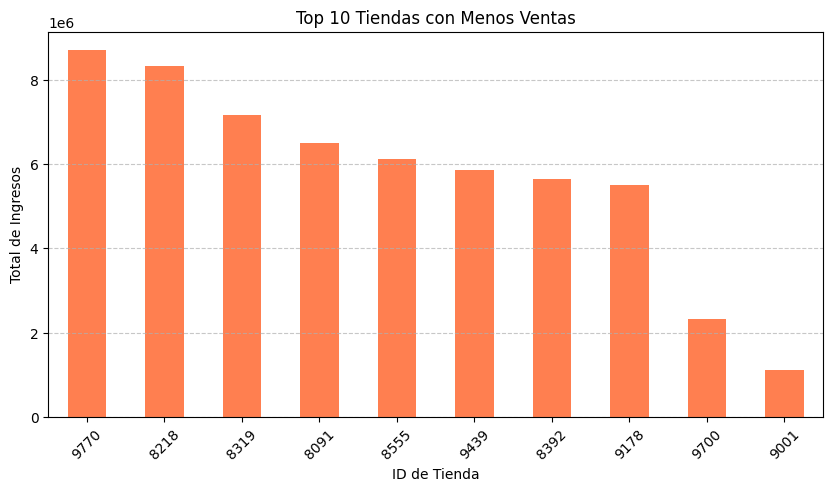

In [15]:
# Filtrar las 10 tiendas con menos ingresos
bottom_n = 10
ventas_peores = ventas_por_tienda.tail(bottom_n)

# Graficar
plt.figure(figsize=(10, 5))
ventas_peores.plot(kind="bar", color="coral")
plt.title(f"Top {bottom_n} Tiendas con Menos Ventas")
plt.xlabel("ID de Tienda")
plt.ylabel("Total de Ingresos")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

Peores 10 tiendas en unidades vendidas

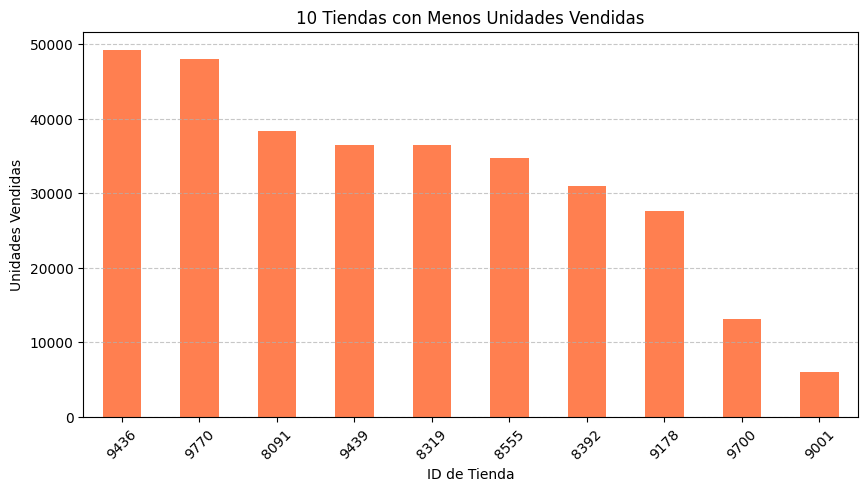

In [16]:
# Filtrar las 10 tiendas con menos unidades vendidas
bottom_n = 10
unidades_peores = unidades_por_tienda.tail(bottom_n)

# Graficar
plt.figure(figsize=(10, 5))
unidades_peores.plot(kind="bar", color="coral")
plt.title(f"{bottom_n} Tiendas con Menos Unidades Vendidas")
plt.xlabel("ID de Tienda")
plt.ylabel("Unidades Vendidas")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [19]:
y=df["Units Sold"]
x=df["Total Price"]

In [20]:
# Fit OLS model
model = sm.OLS(y, x).fit()

# Print summary
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:             Units Sold   R-squared (uncentered):                   0.253
Model:                            OLS   Adj. R-squared (uncentered):              0.253
Method:                 Least Squares   F-statistic:                          5.074e+04
Date:                Wed, 02 Apr 2025   Prob (F-statistic):                        0.00
Time:                        15:02:17   Log-Likelihood:                     -8.4791e+05
No. Observations:              150149   AIC:                                  1.696e+06
Df Residuals:                  150148   BIC:                                  1.696e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

                            OLS Regression Results                            
Dep. Variable:             Units Sold   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     8826.
Date:                Wed, 02 Apr 2025   Prob (F-statistic):               0.00
Time:                        15:02:17   Log-Likelihood:            -8.2404e+05
No. Observations:              150149   AIC:                         1.648e+06
Df Residuals:                  150147   BIC:                         1.648e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          80.0489      0.338    237.062      

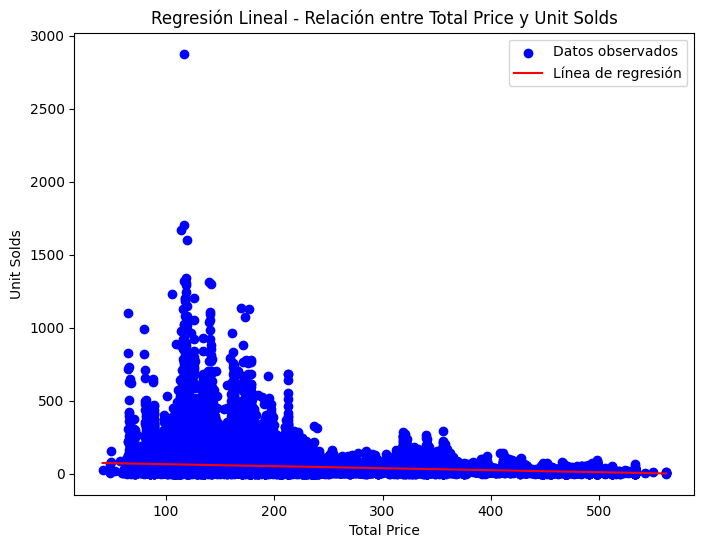

In [21]:
# Agregar constante a X para el modelo OLS
X = sm.add_constant(x)

# Ajustar el modelo OLS
model = sm.OLS(y, X).fit()
print(model.summary())
# Realizar predicciones para la línea de regresión
x_range = np.linspace(x.min(), x.max(), 100)
X_range = sm.add_constant(x_range)
y_pred = model.predict(X_range)

# Graficar la relación y la línea de regresión
plt.figure(figsize=(8, 6))
plt.scatter(x, y, label='Datos observados', color='blue')
plt.plot(x_range, y_pred, color='red', label='Línea de regresión')
plt.title('Regresión Lineal - Relación entre Total Price y Unit Solds')
plt.xlabel('Total Price')
plt.ylabel('Unit Solds')
plt.legend()
plt.show()

# 4. Machine Learning

## 4.1 Regresión Lineal

In [22]:
# 4. Dividir datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# 5. Crear el modelo de regresión lineal
model = linear_model.LinearRegression()

In [24]:
# 6. Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

LinearRegression()

In [25]:
# 7. Realizar predicciones con los datos de prueba
y_pred = model.predict(X_test)
y_pred

array([51.03142125, 51.91728299, 60.97275858, ..., 43.15709465,
       31.24717568, 64.12248922])

In [26]:
# 8. Evaluar el modelo con métricas de error
mse = mean_squared_error(y_test, y_pred)  # Error cuadrático medio
r2 = r2_score(y_test, y_pred)  # Coeficiente de determinación R²

print(f"Error Cuadrático Medio (MSE): {mse:.2f}")
print(f"Coeficiente de Determinación (R²): {r2:.4f}")

Error Cuadrático Medio (MSE): 3078.92
Coeficiente de Determinación (R²): 0.0591


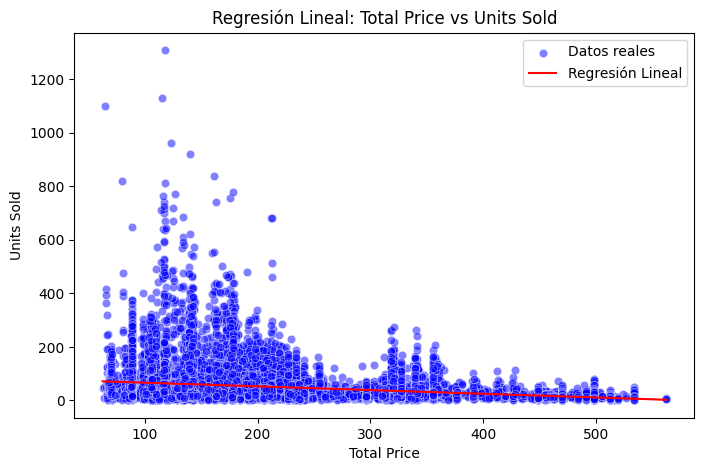

In [27]:
# 9. Visualizar la regresión
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_test["Total Price"], y=y_test, label="Datos reales", color="blue", alpha=0.5)
sns.lineplot(x=X_test["Total Price"], y=y_pred, label="Regresión Lineal", color="red")
plt.xlabel("Total Price")
plt.ylabel("Units Sold")
plt.title("Regresión Lineal: Total Price vs Units Sold")
plt.legend()
plt.show()

## 4.2 Árbol de Decision

In [28]:
# 4. Seleccionar variables
X = df[["Total Price"]]  # Variable independiente
y = df["Units Sold"]  # Variable dependiente
print(X)

        Total Price
0           99.0375
1           99.0375
2          133.9500
3          133.9500
4          141.0750
...             ...
150145     235.8375
150146     235.8375
150147     357.6750
150148     141.7875
150149     234.4125

[150149 rows x 1 columns]


In [29]:
# 5. Dividir datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# 6. Crear el modelo de Árbol de Decisión
tree_model = DecisionTreeRegressor(random_state=42, max_depth=5)  # max_depth limita la complejidad del árbol

In [31]:
# 7. Entrenar el modelo con los datos de entrenamiento
tree_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [32]:
# 8. Realizar predicciones con los datos de prueba
y_pred_tree = tree_model.predict(X_test)
y_pred_tree

array([ 41.50190282,  29.84084084, 106.19919401, ...,  25.86072685,
        45.3676815 ,  62.60116347])

In [33]:
# 9. Evaluar el modelo con métricas de error
mse_tree = mean_squared_error(y_test, y_pred_tree)  # Error cuadrático medio
r2_tree = r2_score(y_test, y_pred_tree)  # Coeficiente de determinación R²

print(f"Error Cuadrático Medio (MSE): {mse_tree:.2f}")
print(f"Coeficiente de Determinación (R²): {r2_tree:.4f}")

Error Cuadrático Medio (MSE): 2795.52
Coeficiente de Determinación (R²): 0.1457


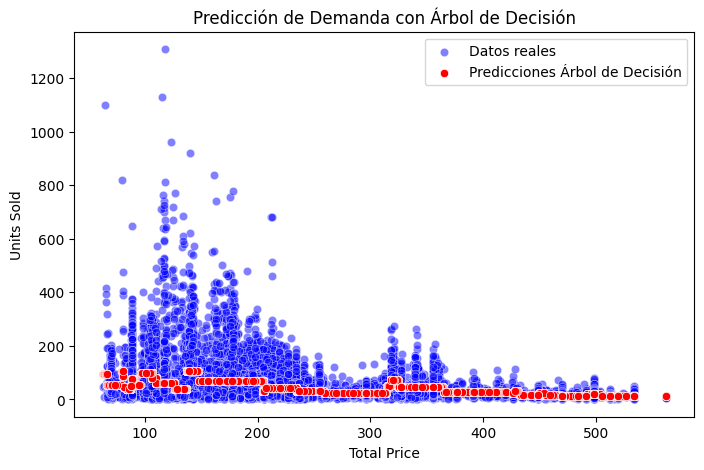

In [34]:
# 10. Visualizar la predicción
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_test["Total Price"], y=y_test, label="Datos reales", color="blue", alpha=0.5)
sns.scatterplot(x=X_test["Total Price"], y=y_pred_tree, label="Predicciones Árbol de Decisión", color="red")
plt.xlabel("Total Price")
plt.ylabel("Units Sold")
plt.title("Predicción de Demanda con Árbol de Decisión")
plt.legend()
plt.show()

### Explicación de cómo la regresión lineal predice la demanda a partir de la variación de precios

La regresión lineal es un modelo matemático que nos permite encontrar una relación entre una variable independiente (Total Price) y una variable dependiente (Units Sold). La ecuación resultante de la regresión es:

![image.png](attachment:image.png)

donde:

•	mmm es la pendiente (indica cuánto cambia la demanda cuando el precio varía).


•	bbb es el intercepto (el valor de la demanda cuando el precio es 0).

Si mmm es negativo, significa que cuando el precio sube, la demanda baja, lo cual sigue la ley de la demanda en economía. Si mmm es positivo (como en un Bien Giffen), la demanda aumenta con el precio.

¿Cómo nos ayuda a predecir la demanda?

•	Una vez que tenemos la ecuación de la regresión, podemos ingresar cualquier precio y el modelo nos devolverá la cantidad estimada de productos vendidos.

•	Nos permite simular escenarios: ¿qué pasaría si aumentamos o reducimos los precios?

•	Es útil para establecer estrategias de precios óptimos en el negocio.

¿Por qué la regresión lineal? 

Es un modelo simple que nos permite predecir la demanda con una ecuación fácil de interpretar.